TfidfVectorizer

In [252]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [253]:
import time

In [254]:
start_time = time.time()

In [255]:
from sklearn.model_selection import train_test_split
# Загрузка данных с первого листа файла Excel
df = pd.read_excel('../data/dataSet.xlsx', sheet_name='DataFull')

In [256]:
X_text = df['Предприятие']
X_condition = df['Условия']
y = df['Соответствие']

In [257]:
# Объединение описания и условия участия в один текстовый признак
X_combined = X_text + ' ' + X_condition

In [258]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [259]:
# Преобразование текста с использованием TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [260]:
# Обучение модели логистической регрессии
lr_classifier = RandomForestClassifier()
lr_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [261]:
# Предсказание и оценка точности
y_pred_lr = lr_classifier.predict(X_test_tfidf)
accuracy_tfdi = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_tfdi)

Accuracy: 0.7272727272727273


In [262]:
# Запомните время окончания выполнения кода
end_time = time.time()

# Вычислите время выполнения в миллисекундах
execution_time_ms_tfi_di = (end_time - start_time) * 1000

print("Время выполнения:", execution_time_ms_tfi_di, "миллисекунд")

Время выполнения: 735.0802421569824 миллисекунд


tensorflow

In [263]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [264]:
start_time = time.time()

In [265]:
# Загрузка данных с первого листа файла Excel
df = pd.read_excel('../data/dataSet.xlsx', sheet_name='DataFull')

In [266]:
X_text = df['Предприятие']
X_condition = df['Условия']
y = df['Соответствие']

In [267]:
    # Подготовка текстовых данных
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text)
X_text_seq = tokenizer.texts_to_sequences(X_text)
max_text_sequence_length = max(len(seq) for seq in X_text_seq)
X_text_pad = pad_sequences(X_text_seq, maxlen=max_text_sequence_length)

In [268]:
# Подготовка данных по условиям участия
condition_vocab_size = len(set(X_condition))
X_condition_encoded = np.array(X_condition.apply(lambda x: hash(x) % condition_vocab_size))

In [269]:
# Построение текстового входа
text_input = Input(shape=(max_text_sequence_length,))
text_embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)(text_input)
text_lstm = LSTM(units=100)(text_embedding)

In [270]:
# Построение входа для условий участия
condition_input = Input(shape=(1,))
condition_dense = Dense(100)(condition_input)

In [271]:
# Объединение текстового и входа для условий участия
concatenated = concatenate([text_lstm, condition_dense])

# Полносвязные слои для классификации
output = Dense(1, activation='sigmoid')(concatenated)

In [272]:
# Создание модели
model = Model(inputs=[text_input, condition_input], outputs=output)

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit([X_text_pad, X_condition_encoded], y, epochs=20, batch_size=64, validation_split=0.2)

# Получение значений accuracy на последней эпохе
accuracy_lstm = history.history['accuracy'][-1]
accuracy_lstm

Epoch 1/20


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4884 - loss: 0.7227 - val_accuracy: 0.8182 - val_loss: 0.6085
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4884 - loss: 0.7064 - val_accuracy: 0.8182 - val_loss: 0.6428
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5116 - loss: 0.6944 - val_accuracy: 0.6364 - val_loss: 0.6809
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6512 - loss: 0.6861 - val_accuracy: 0.1818 - val_loss: 0.7199
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5814 - loss: 0.6806 - val_accuracy: 0.1818 - val_loss: 0.7543
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5349 - loss: 0.6762 - val_accuracy: 0.1818 - val_loss: 0.7775
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5814 - loss: 0.6702 - val_accuracy: 0.2727 - val_loss: 0.7830
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6047 - loss: 0.6599 - val_accuracy: 0.2727 - val_loss: 0.7656
Epoch 9/20
1/

0.7209302186965942

In [273]:
# Запомните время окончания выполнения кода
end_time = time.time()

# Вычислите время выполнения в миллисекундах
execution_time_ms_lstm = (end_time - start_time) * 1000

print("Время выполнения:", execution_time_ms_lstm, "миллисекунд")

Время выполнения: 4173.8600730896 миллисекунд


Word2Vec

In [274]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Артём\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [275]:
start_time = time.time()

In [276]:
# Загрузка данных с первого листа файла Excel
df = pd.read_excel('../data/dataSet.xlsx', sheet_name='DataFull')

In [277]:
# Предварительная обработка текста
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Токенизация и приведение к нижнему регистру
    return tokens

In [278]:
df['processed_text'] = df['Предприятие'].apply(preprocess_text) + df['Условия'].apply(preprocess_text)

In [279]:
# Построение модели Word2Vec
model = Word2Vec(sentences=df['processed_text'], vector_size=100, window=5, min_count=1, workers=4)

# Получение векторных представлений текстов
def get_text_vectors(text):
    vectors = []
    for word in text:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return [0] * 100  # Заменяем отсутствующие слова нулевыми векторами

In [280]:
df['text_vectors'] = df['processed_text'].apply(get_text_vectors)

# Подготовка данных для классификации
X = pd.DataFrame(df['text_vectors'].to_list())
y = df['Соответствие']

In [281]:
# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение классификатора (например, случайный лес)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Оценка качества классификатора
y_pred = classifier.predict(X_test)
accuracy_word2vec = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_word2vec)

Test Accuracy: 0.6363636363636364


In [282]:
# Запомните время окончания выполнения кода
end_time = time.time()

# Вычислите время выполнения в миллисекундах
execution_time_ms_word2vec = (end_time - start_time) * 1000

print("Время выполнения:", execution_time_ms_word2vec, "миллисекунд")

Время выполнения: 545.280933380127 миллисекунд


Graph

In [283]:
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [284]:
start_time = time.time()

In [285]:
df = pd.read_excel('../data/dataSet.xlsx', sheet_name='DataFull')

In [286]:
# Удаление стоп-слов
stop_words = set(stopwords.words('russian'))
df['Условия'] = df['Условия'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Создание графа
G = nx.Graph()

In [287]:
# Добавление узлов (предприятий)
companies = df['Предприятие'].unique()
G.add_nodes_from(companies)

In [288]:
# Добавление ребер (связей между предприятиями, представляющих наличие общих условий участия)
for _, row in df.iterrows():
    conditions = set(row['Условия'].split())
    for company in companies:
        if company != row['Предприятие']:
            other_conditions = set(df[df['Предприятие'] == company]['Условия'].iloc[0].split())
            common_conditions = conditions.intersection(other_conditions)
            if len(common_conditions) > 0:
                G.add_edge(row['Предприятие'], company)


In [289]:
labels = {}
for company in companies:
    labels[company] = df[df['Предприятие'] == company]['Соответствие'].iloc[0]

In [290]:
# Извлечение графовых признаков
graph_features = []
for company in companies:
    neighbors = list(G.neighbors(company))
    num_neighbors = len(neighbors)
    graph_features.append([num_neighbors])

In [291]:
# Преобразование списка в массив NumPy
X = np.array(graph_features)
y = np.array([labels[company] for company in companies])

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели классификации
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [292]:
# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка производительности модели
accuracy_graph = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_graph)

Accuracy: 0.25


In [293]:
# Запомните время окончания выполнения кода
end_time = time.time()

# Вычислите время выполнения в миллисекундах
execution_time_ms_graph = (end_time - start_time) * 1000

print("Время выполнения:", execution_time_ms_graph, "миллисекунд")

Время выполнения: 905.264139175415 миллисекунд


FastText

In [294]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from gensim.models import FastText
from nltk.corpus import stopwords
import numpy as np

In [295]:
start_time = time.time()

In [296]:
df = pd.read_excel('../data/dataSet.xlsx', sheet_name='DataFull')

In [297]:
# Объединение описания предприятия и условий госпрограммы в один текст
df['Общий текст'] = df['Предприятие'] + ' ' + df['Условия']

# Удаление стоп-слов
stop_words = set(stopwords.words('russian'))
df['Общий текст'] = df['Общий текст'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [298]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df['Общий текст'], df['Соответствие'], test_size=0.2, random_state=42)

In [299]:
# Обучение FastText на текстовых данных
sentences = [text.split() for text in X_train]
model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [300]:
# Преобразование текстовых данных в вектора
def text_to_vector(text):
    words = text.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X_train_vectors = np.array([text_to_vector(text) for text in X_train])
X_test_vectors = np.array([text_to_vector(text) for text in X_test])

In [301]:
# Обучение модели классификации
clf = RandomForestClassifier()
clf.fit(X_train_vectors, y_train)

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test_vectors)

# Оценка производительности модели
accuracy_fastText = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_fastText)

Accuracy: 0.5454545454545454


In [302]:
# Запомните время окончания выполнения кода
end_time = time.time()

# Вычислите время выполнения в миллисекундах
execution_time_ms_fast_text = (end_time - start_time) * 1000

print("Время выполнения:", execution_time_ms_fast_text, "миллисекунд")

Время выполнения: 1341.9189453125 миллисекунд


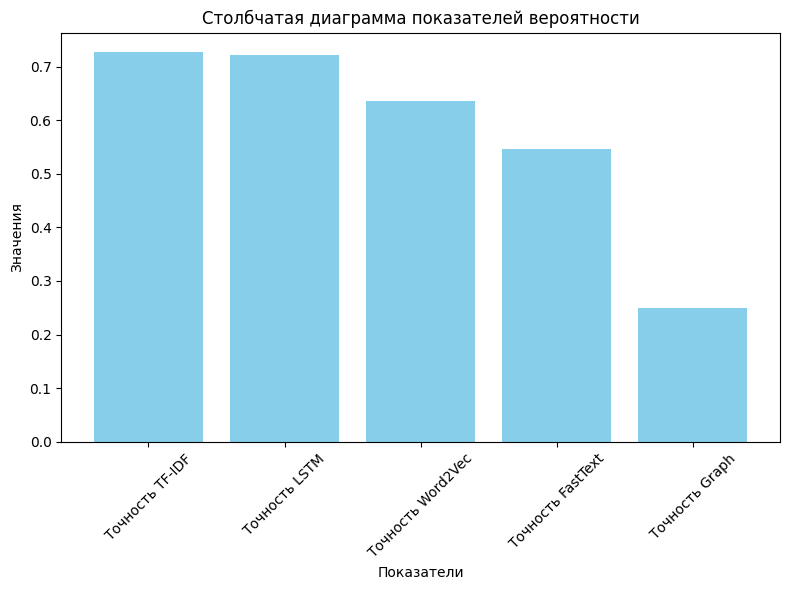

In [303]:
import matplotlib.pyplot as plt

# Задаем данные для столбчатой диаграммы
labels = ['Точность TF-IDF', 'Точность LSTM', 'Точность Word2Vec', 'Точность FastText', 'Точность Graph']
values = [accuracy_tfdi, accuracy_lstm, accuracy_word2vec, accuracy_fastText, accuracy_graph]  # Пример значений, замените их на ваши

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 6))  # Размер графика
plt.bar(labels, values, color='skyblue')  # Строим столбцы

# Добавляем название графика и подписи осей
plt.title('Столбчатая диаграмма показателей вероятности')
plt.xlabel('Показатели')
plt.ylabel('Значения')

# Отображаем график
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.tight_layout()  # Автоматическое корректирование расположения элементов для избежания наложения
plt.show()

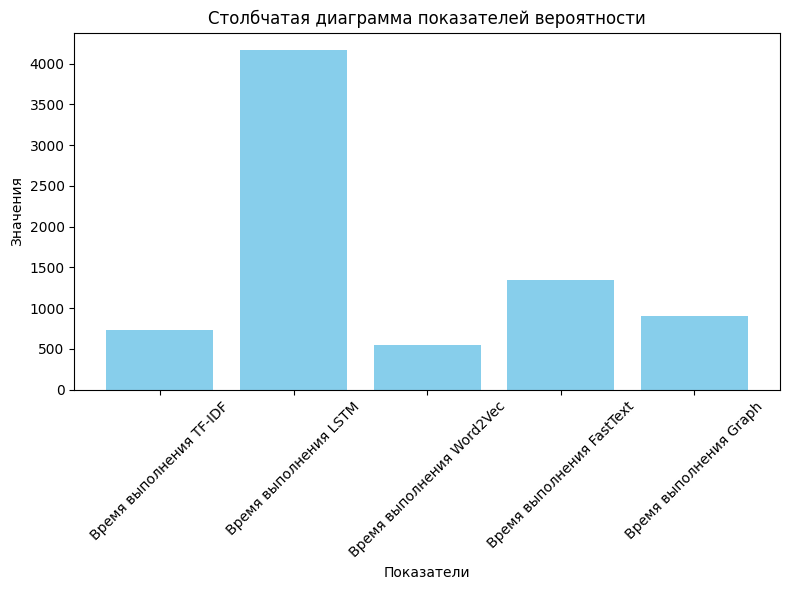

In [304]:
# Задаем данные для столбчатой диаграммы
labels = ['Время выполнения TF-IDF', 'Время выполнения LSTM', 'Время выполнения Word2Vec', 'Время выполнения FastText', 'Время выполнения Graph']
values = [execution_time_ms_tfi_di, execution_time_ms_lstm, execution_time_ms_word2vec, execution_time_ms_fast_text, execution_time_ms_graph]  # Пример значений, замените их на ваши

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 6))  # Размер графика
plt.bar(labels, values, color='skyblue')  # Строим столбцы

# Добавляем название графика и подписи осей
plt.title('Столбчатая диаграмма показателей вероятности')
plt.xlabel('Показатели')
plt.ylabel('Значения')

# Отображаем график
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.tight_layout()  # Автоматическое корректирование расположения элементов для избежания наложения
plt.show()